**Research Questions:** 
* *What was the Black urban ecology of safety in post-WWII Los Angeles?* Through analyzing Green Book location data from 1947 and 1956, before and after the outlaw of racially restrictive covenants, in Los Angeles, I seek to reveal a local landscape of safety and interrogate how shifts in discriminatory policies governing private and public space may have impacted this temporal network. 

* *What was the impact of shifts in neighborhood socioeconomic demographics on this ecology of safety?* I'd like to compare this with race and economic indicators such as blue or white collar work, level of education, home values and rents by Census tract adjacent to these years to better understand both shifts and the spatial composition in these landscapes of safety amidst complex urban neighborhood changes.  

**Data Sources:**
* [Green Book locations by type for SoCal, 1947](https://github.com/NYPL-publicdomain/greenbook-map/tree/master/data) (Schomburg Center for Research in Black Culture at the New York Public Library)
* [Green Book locations by type for SoCal, 1956](https://github.com/NYPL-publicdomain/greenbook-map/tree/master/data) (Schomburg Center for Research in Black Culture at the New York Public Library)
* [Los Angeles County Union Census Tract Data Series, 1940-1990](https://drive.google.com/drive/folders/1KiflC3DOQJoo_DTiZGzbr3-_QhvTh1nl?usp=sharing) from Ethington, Kooistra, and DeYoung (add official citation here) (*Note:I will consult 1950 as an informative datapoint, but this project is focused on the change explicitly before and after racially restrictive covenants were struck down in the 1948 Shelley v. Kramer decision.*)
    * From this dataset, I am interested in the following variables and years that will help me better understand the **racial demographics** of the area in both 1940 and 1960 (where yy = year):
        * **PyyB:** Population Black non-White
            * **PyyT** used to calculate percentage of Black non-white population.
    * Median household income data is not available until 1970 in this dataset, so I will explore  a few of the following variables to better understand the surrounding **socioeconomic context** in both 1940 and 1960 (where yy = year)::
        * **EyyH:**	Education completed high school 
        * **EyyC:**	Education completed college 
        * **OyyWC:**	Occupation White Collar
        * **OyyBC:**	Occupation Blue Collar
        * **HyyMVL:**	Median value of dwelling/housing units
        * **HyyMRN:**	Housing Median Rent of Unit

In [1]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
pwd

'/home/jovyan/GISproject/Midterm'

In [3]:
gdf = gpd.read_file('./Data/1947-Copy1.geojson')

# <hl> Data Exploration

In [4]:
gdf.head()

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
0,"around 20,",000 miles per year,http://images.nypl.org/index.php?id=5207629&t=q,5207629,2a4111a0-892b-0132-5d0d-58d385a7bbd0,http://digitalcollections.nypl.org/items/2a411...,12,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.10086027884900624, 'y': 0.521487419283...","000 Miles Rd, Mulberry, Tennessee 37359, Unite...",0.509286,POINT (-86.39971 35.19817)
1,St. Thomas,127 W. 10th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.12726176115802174, 'y': 0.166629736317...","127 W 10th St, Chattanooga, Tennessee 37402, U...",0.852143,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,69 Cotton St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,ANDALUSIA,TENNESSEE,Tourist Home,"{'x': 0.12907117008443908, 'y': 0.222690006647...","69 S Cotton St, Andalusia, Alabama 36420, Unit...",0.728333,POINT (-86.48221 31.30161)
3,Dunbar,323 N. 17th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11459589867310013, 'y': 0.266341679592...","323 N 17th St, Knoxville, Tennessee 37921, Uni...",0.852143,POINT (-83.93629 35.96380)
4,Palm Leaf,328 1/2 18th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11670687575392039, 'y': 0.289829381785...","328 18th St, Knoxville, Tennessee 37916, Unite...",0.828333,POINT (-83.93586 35.95957)


In [5]:
gdf.sample(10)

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
207,Waffle Shop,1063 E. 43 Street,http://images.nypl.org/index.php?id=5207648&t=q,5207648,2be35310-892b-0132-32c1-58d385a7bbd0,http://digitalcollections.nypl.org/items/2be35...,31,1947,LOS ANGELES,CALIFORNIA,Restaurant,"{'x': 0.10335448776065277, 'y': 0.803899844892...","1063 E 43 St, Kansas City, Missouri 64110, Uni...",0.619000,POINT (-94.57297 39.04892)
28,Dr. Dunning,7th & Columbia Ave.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,EL DORADO,ARKANSAS,Tourist Home,"{'x': 0.5542822677925211, 'y': 0.3551961001551...","Columbia Ave, El Dorado, Arkansas 71730, Unite...",0.796000,POINT (-92.66699 33.22013)
350,Mac's,2637 Welton Street,http://images.nypl.org/index.php?id=5207650&t=q,5207650,2c170280-892b-0132-f209-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c170...,33,1947,COLORADO SPRINGS V,COLORADO,Garage,"{'x': 0.5433665760048353, 'y': 0.2468424551296...","2637 Welton St, Denver, Colorado 80205, United...",0.620000,POINT (-104.97857 39.75457)
597,P B. Reeves,4803 Bond Ave.,http://images.nypl.org/index.php?id=5207655&t=q,5207655,2c81b510-892b-0132-1766-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c81b...,38,1947,EAST ST. LOUIS,GEORGIA,Tourist Home,"{'x': 0.11053593179049938, 'y': 0.439840460890...","4803 Bond Ave, East Saint Louis, Illinois 6220...",0.870000,POINT (-90.11978 38.58223)
594,Langenﬁeld,120 N. Poular St.,http://images.nypl.org/index.php?id=5207655&t=q,5207655,2c81b510-892b-0132-1766-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c81b...,38,1947,CHICAGO,GEORGIA,Service Station,"{'x': 0.08739342265529841, 'y': 0.306004874806...","120 North Rd, Poulan, Georgia 31781, United St...",0.509286,POINT (-83.78226 31.58206)
595,Just A Mere Hotel,218 E. North St.,http://images.nypl.org/index.php?id=5207655&t=q,5207655,2c81b510-892b-0132-1766-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c81b...,38,1947,DANVILLE,GEORGIA,Hotel,"{'x': 0.09591961023142509, 'y': 0.362729891424...","218 E North St, Danville, Texas 75662, United ...",0.852143,POINT (-94.87450 32.38632)
601,Twenty Grand,523 Smith St.,http://images.nypl.org/index.php?id=5207655&t=q,5207655,2c81b510-892b-0132-1766-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c81b...,38,1947,PEORIA,GEORGIA,Tourist Home,"{'x': 0.0986601705237515, 'y': 0.5581653002437...","523 Smith St, Mount Vernon, Georgia 30445, Uni...",0.828333,POINT (-82.58950 32.18570)
349,Mattherson's,2637 Welton St.,http://images.nypl.org/index.php?id=5207650&t=q,5207650,2c170280-892b-0132-f209-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c170...,33,1947,COLORADO SPRINGS V,COLORADO,Garage,"{'x': 0.5560592323964945, 'y': 0.2344338577442...","2637 Welton St, Denver, Colorado 80205, United...",0.620000,POINT (-104.97857 39.75457)
221,M. Wilson,2818 S. Central Avenue,http://images.nypl.org/index.php?id=5207648&t=q,5207648,2be35310-892b-0132-32c1-58d385a7bbd0,http://digitalcollections.nypl.org/items/2be35...,31,1947,LOS ANGELES,CALIFORNIA,Restaurant,"{'x': 0.5454820187367785, 'y': 0.1661865721249...","2818 S Central Ave, Los Angeles, California 90...",0.996000,POINT (-118.25584 34.01655)
149,Burly Ridue,126 So. lst Street,http://images.nypl.org/index.php?id=5207647&t=q,5207647,2bc89e70-892b-0132-2a3c-58d385a7bbd0,http://digitalcollections.nypl.org/items/2bc89...,30,1947,PHOENIX,ARIZONA,Garage,"{'x': 0.5398069963811821, 'y': 0.2508309328606...","126 South Rd, Tonto Basin, Arizona 85553, Unit...",0.509286,POINT (-111.30123 33.83438)


In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1056 non-null   object  
 1   address              1056 non-null   object  
 2   image_url            1056 non-null   object  
 3   image_id             1056 non-null   object  
 4   capture_uuid         1056 non-null   object  
 5   dc_url               1056 non-null   object  
 6   page                 1056 non-null   int64   
 7   year                 1056 non-null   int64   
 8   city                 1056 non-null   object  
 9   state                1056 non-null   object  
 10  category             1056 non-null   object  
 11  image_region         1056 non-null   object  
 12  geocoded_address     1056 non-null   object  
 13  geocoded_confidence  1056 non-null   float64 
 14  geometry             1056 non-null   geometry
dtypes: float64(1)

In [7]:
gdf.shape
#1056 records, 15 columns

(1056, 15)

In [8]:
gdf.city

0       WESTCHESTER
1       WESTCHESTER
2         ANDALUSIA
3        BIRMINGHAM
4        BIRMINGHAM
           ...     
1051       CAPE MAY
1052       CAPE MAY
1053       CAPE MAY
1054       CAPE MAY
1055       CAPE MAY
Name: city, Length: 1056, dtype: object

In [9]:
gdf['city'].value_counts()

LOS ANGELES             101
ST. JOSEPH               57
COLORADO SPRINGS V       51
DISTRICT OF COLUMBIA     47
LITTLE ROCK              47
                       ... 
ORLANDO                   1
ST AUGUSTINE              1
MORGAN CITY               1
MONROE                    1
GARY                      1
Name: city, Length: 167, dtype: int64

Los Angeles has the most entries in the Greenbook! Exciting!

# <hl> New Variables for City and Location Type

In [10]:
#save as new variable
gdf_count = gdf['city'].value_counts()

In [11]:
#add dataframe
gdf_count = gdf_count.reset_index()
gdf_count

,index,city
0,LOS ANGELES,101
1,ST. JOSEPH,57
2,COLORADO SPRINGS V,51
3,DISTRICT OF COLUMBIA,47
4,LITTLE ROCK,47
...,...,...
162,ORLANDO,1
163,ST AUGUSTINE,1
164,MORGAN CITY,1
165,MONROE,1


In [12]:
gdf.category

0       Tourist Home
1       Tourist Home
2       Tourist Home
3       Tourist Home
4       Tourist Home
            ...     
1051          Garage
1052          Garage
1053          Garage
1054          Garage
1055          Garage
Name: category, Length: 1056, dtype: object

In [13]:
gdf['category'].value_counts()

Tourist Home                241
Hotel                       197
Restaurant                  163
Beauty Parlor                89
Tavern                       84
Barber Shop                  49
Service Station              49
Drug Store                   39
Night Club                   38
Liquor Shop                  30
Garage                       26
Tailor                       26
Sanitarium                    5
Hot Spring                    4
Beauty School                 3
Road House                    3
=‘-.tavern                    3
Taxi                          3
Beauty Shop                   2
School Of Beauty Eulture      1
School Of Beauty Culture      1
Name: category, dtype: int64

In [14]:
#save category as variable
category_count = gdf['category'].value_counts()
category_count

Tourist Home                241
Hotel                       197
Restaurant                  163
Beauty Parlor                89
Tavern                       84
Barber Shop                  49
Service Station              49
Drug Store                   39
Night Club                   38
Liquor Shop                  30
Garage                       26
Tailor                       26
Sanitarium                    5
Hot Spring                    4
Beauty School                 3
Road House                    3
=‘-.tavern                    3
Taxi                          3
Beauty Shop                   2
School Of Beauty Eulture      1
School Of Beauty Culture      1
Name: category, dtype: int64

In [15]:
#check 
type(category_count)

pandas.core.series.Series

In [16]:
category_count

Tourist Home                241
Hotel                       197
Restaurant                  163
Beauty Parlor                89
Tavern                       84
Barber Shop                  49
Service Station              49
Drug Store                   39
Night Club                   38
Liquor Shop                  30
Garage                       26
Tailor                       26
Sanitarium                    5
Hot Spring                    4
Beauty School                 3
Road House                    3
=‘-.tavern                    3
Taxi                          3
Beauty Shop                   2
School Of Beauty Eulture      1
School Of Beauty Culture      1
Name: category, dtype: int64

# <hl> Quick Plot Chart of Greenbook locations, 1947 (national)

<AxesSubplot:>

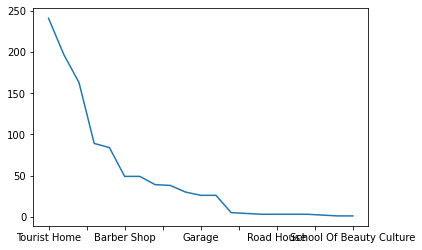

In [17]:
category_count.plot()

<AxesSubplot:title={'center':'Types of Locations in the Green Book 1947'}>

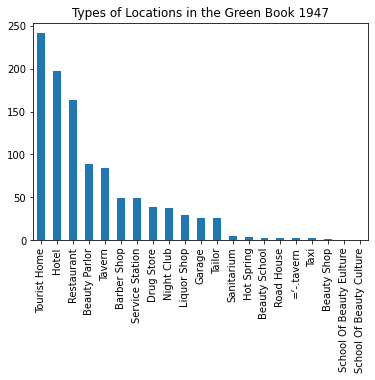

In [18]:
category_count.plot.bar(x = 'location type', y = 'count', title = 'Types of Locations in the Green Book 1947')

In [19]:
gdf['city'].value_counts()

#save category as variable
city_count = gdf['city'].value_counts()
city_count

LOS ANGELES             101
ST. JOSEPH               57
COLORADO SPRINGS V       51
DISTRICT OF COLUMBIA     47
LITTLE ROCK              47
                       ... 
ORLANDO                   1
ST AUGUSTINE              1
MORGAN CITY               1
MONROE                    1
GARY                      1
Name: city, Length: 167, dtype: int64

<AxesSubplot:>

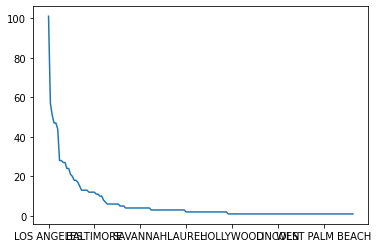

In [20]:
city_count.plot()

<AxesSubplot:title={'center':'Frequency of Cities in the Green Book 1947'}>

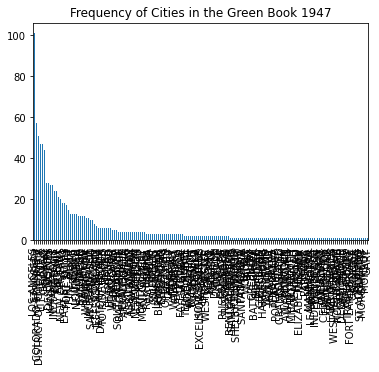

In [21]:
city_count.plot.bar(x = 'city', y = 'count', title = 'Frequency of Cities in the Green Book 1947')

# <hl> Trim Data + Make New Variable

In [22]:
#recheck data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1056 non-null   object  
 1   address              1056 non-null   object  
 2   image_url            1056 non-null   object  
 3   image_id             1056 non-null   object  
 4   capture_uuid         1056 non-null   object  
 5   dc_url               1056 non-null   object  
 6   page                 1056 non-null   int64   
 7   year                 1056 non-null   int64   
 8   city                 1056 non-null   object  
 9   state                1056 non-null   object  
 10  category             1056 non-null   object  
 11  image_region         1056 non-null   object  
 12  geocoded_address     1056 non-null   object  
 13  geocoded_confidence  1056 non-null   float64 
 14  geometry             1056 non-null   geometry
dtypes: float64(1)

In [23]:
#Trim data to only show name, city, state, category, and geometry
gdf[['name', 'city', 'state', 'category', 'geometry']]

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


In [24]:
#Make short list its own variable
desired_columns = ['name', 'city', 'state', 'category', 'geometry']

gdf[desired_columns]

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


In [25]:
gdf[desired_columns].head()

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)


In [26]:
#Make a New Variable with Trimmed Data
gdf_trimmed = gdf[desired_columns].copy()
gdf_trimmed

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


# How many different types of locations for Los Angeles are represented in the 1947 Green Book?

In [27]:
gdf_trimmed[gdf_trimmed.city == 'LOS ANGELES']

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [28]:
#here's another way to do this
gdf_trimmed.loc[gdf_trimmed['city'] == 'LOS ANGELES']

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [29]:
#and another way
gdf_trimmed.query("city == 'LOS ANGELES'")

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


<AxesSubplot:>

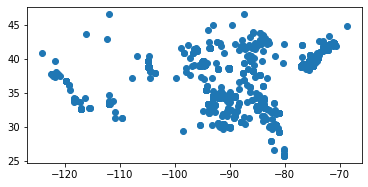

In [30]:
gdf_trimmed.plot()

In [31]:
gdf_trimmed.geometry

0       POINT (-86.39971 35.19817)
1       POINT (-85.31081 35.04481)
2       POINT (-86.48221 31.30161)
3       POINT (-83.93629 35.96380)
4       POINT (-83.93586 35.95957)
                   ...            
1051    POINT (-74.90600 38.93510)
1052    POINT (-74.90600 38.93510)
1053    POINT (-74.90600 38.93510)
1054    POINT (-74.88674 39.00496)
1055    POINT (-74.92414 39.04871)
Name: geometry, Length: 1056, dtype: geometry

<AxesSubplot:>

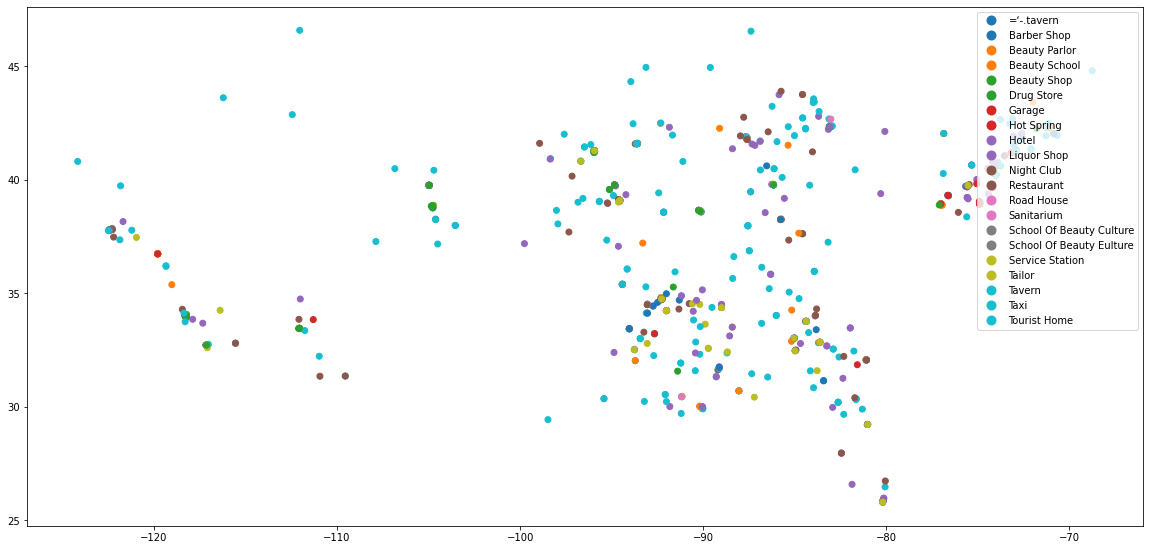

In [32]:
#Let's make this plot prettier!
gdf.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default); figsize = bpi unit
            column = 'category',   # column that defines the color of the dots; randomized
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side, top right
) 

In [33]:
#before we move to adding arguments to the folium map, let's make a variable for the locations only in LA
gdf_la = gdf_trimmed.query("city == 'LOS ANGELES'")
gdf_la

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [34]:
gdf_la.query("category == 'Restaurant'")

,name,city,state,category,geometry
189,Marble Inn,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.24078 33.92952)
190,Robertson's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25646 33.99982)
191,Chief,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.26514 33.95154)
192,Ivie's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25639 34.00394)
193,Pig N’ Pat,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25630 34.00738)
194,Henry Bros.,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.24280 33.94060)
195,Banks,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.26514 33.95154)
196,Nita's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.27467 34.00402)
197,John's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.30889 34.02425)
198,Eddie’s,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25684 34.00721)


<AxesSubplot:>

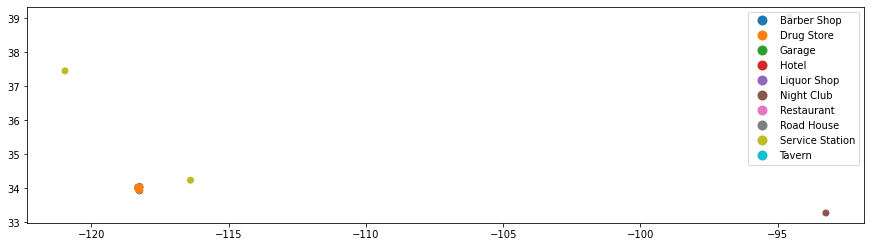

In [35]:
#Plot for just LA
gdf_la.plot(
            figsize=(15,12),   #size of the plot (a bit bigger than the default); figsize = bpi unit
            column = 'category',   # column that defines the color of the dots; randomized
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side, top right
) 

In [36]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry= 'geometry') #define which column is long and lat

In [37]:
# output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
# reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_la_web_mercator = gdf_la.to_crs(epsg=3857)

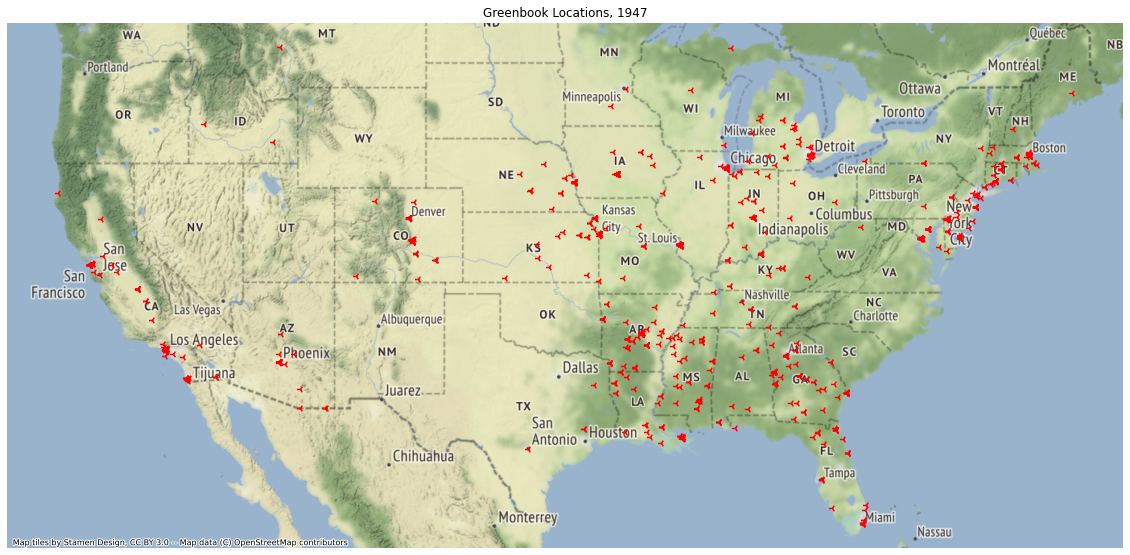

In [39]:
# map it
fig, ax = plt.subplots(figsize=(20,12))

gdf_web_mercator.plot(ax=ax, 
                      marker='3',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Greenbook Locations, 1947')

ctx.add_basemap(ax)

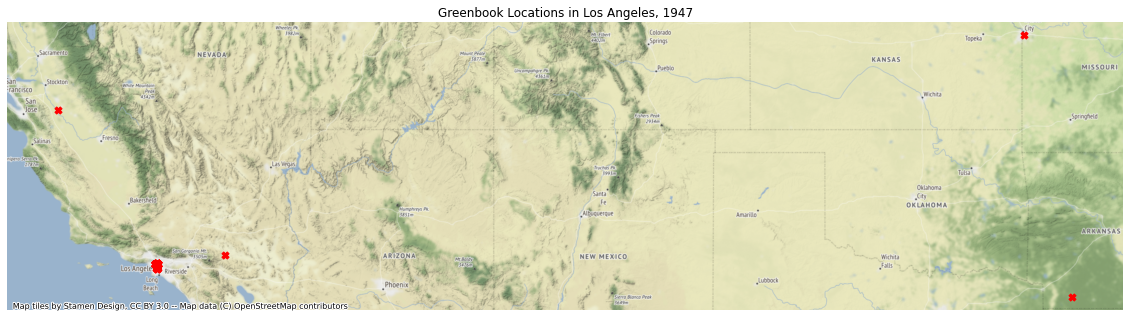

In [40]:
# map it
fig, ax = plt.subplots(figsize=(20, 12))

gdf_la_web_mercator.plot(ax=ax, 
                    marker='X',
                    markersize=50,
                    color='red')

ax.axis('off')

ax.set_title('Greenbook Locations in Los Angeles, 1947')

ctx.add_basemap(ax)

In [41]:
gdf_la.head(10)

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
179,Elite,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24534 34.03004)
180,Olympic,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24363 34.03296)
181,Regal,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24221 34.04068)
182,Sojourner’s,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25410 34.01866)
183,Kentucky,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24489 34.03079)


In [42]:
gdf_la.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 101 entries, 174 to 274
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      101 non-null    object  
 1   city      101 non-null    object  
 2   state     101 non-null    object  
 3   category  101 non-null    object  
 4   geometry  101 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 4.7+ KB


In [43]:
#let's see what types of locations are in Los Angeles given that we have some outliers on the map
gdf_la.city.unique()

array(['LOS ANGELES'], dtype=object)

In [44]:
#let's see what types of locations are in Los Angeles
gdf_la.category.unique()

array(['Hotel', 'Restaurant', 'Barber Shop', 'Tavern', 'Night Club',
       'Road House', 'Liquor Shop', 'Service Station', 'Garage',
       'Drug Store'], dtype=object)

<AxesSubplot:>

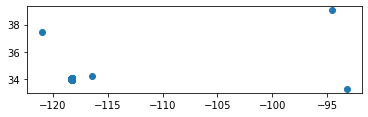

In [45]:
gdf_la.plot()

In [46]:
gdf_la['category'].value_counts()

Restaurant         34
Hotel              15
Tavern             12
Service Station    10
Night Club          9
Barber Shop         7
Drug Store          7
Liquor Shop         3
Garage              3
Road House          1
Name: category, dtype: int64

In [47]:
LAcount = gdf_la['category'].value_counts()

<AxesSubplot:>

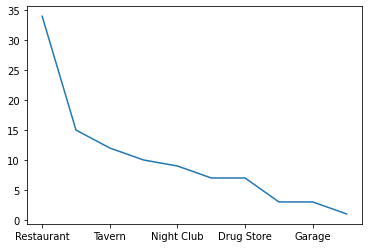

In [48]:
LAcount.plot()

<AxesSubplot:title={'center':'Greenbook Location Types in Los Angeles, 1947'}>

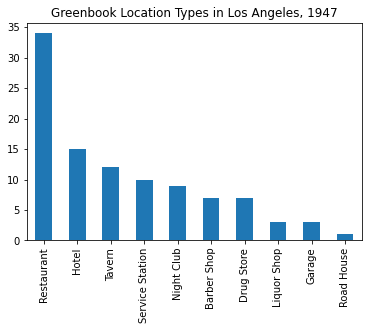

In [49]:
LAcount.plot.bar(x = 'category', y = 'count', title = 'Greenbook Location Types in Los Angeles, 1947')

In [50]:
gdf_la.head()

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)


In [51]:
#display rows that match a query...How many locations in LA were barber shops?
gdf_la.loc[gdf_trimmed['category'] == 'Barber Shop']

,name,city,state,category,geometry
223,Hotel,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.24994 34.02511)
224,Elite,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25609 34.00728)
225,Connie's,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25326 34.02148)
226,Bertha’ 3,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.29842 34.02551)
227,Personality,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25611 34.00682)
228,Williams,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.30916 34.02239)
229,Echo,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25646 33.98796)


# <hl> What spatial relationships are there between Greenbook locations and race?

In [52]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [53]:
df = gpd.read_file('./Data/ethington.geojson')

In [54]:
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O90BC,R90SH85,R90SC85,R90OT85,H90TOT,H90SFU,H90OTH,INC90MED,H90MVL,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,2728.0,2920.0,6009.0,1962.0,3839.0,3691.0,148.0,38150.0,116448.0,"POLYGON ((2010981.306 627195.895, 2010995.035 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,380.0,846.0,556.0,201.0,566.0,487.0,79.0,34600.0,123655.0,"POLYGON ((2020599.176 646773.950, 2019391.617 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,799.0,1084.0,1628.0,748.0,1435.0,1197.0,238.0,43799.0,152655.0,"POLYGON ((1970302.753 633587.024, 1970305.899 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,608.0,968.0,1092.0,339.0,960.0,667.0,293.0,36702.0,161744.0,"POLYGON ((1970159.706 646429.761, 1970161.774 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,454.0,902.0,731.0,252.0,816.0,421.0,395.0,24976.0,139873.0,"POLYGON ((1987195.131 635140.066, 1987988.002 ..."


In [55]:
df.shape

(1656, 252)

This data file contains 252 different variables for 1656 Census tracts in Los Angeles County from 1940-1990. *Wow!* This will be so helpful to understand the surrounding Los Angeles landscape from both before and after racially restrictive covenants became outlawed in 1948.

Let's view a sample:

In [56]:
df.sample

<bound method NDFrame.sample of               AREA     PERIMETER   CTBNA  P40T  P40WNH  P40BNH  P40ONH  \
0     5.110526e+08   97788.60030  900100   615     605       1       3   
1     4.139640e+08  112335.98215  900200  1312    1287       2      11   
2     9.627060e+08  143092.75454  901202  1063    1038       1      20   
3     2.129940e+08   60542.54667  900900  1150    1122       3      14   
4     5.892047e+07   38184.45935  900300   522     511       2       5   
...            ...           ...     ...   ...     ...     ...     ...   
1651  1.686172e+06    6307.33871  297500  2700    2642      37       9   
1652  1.913036e+08  102213.08792  599100   881     854       3       3   
1653  6.157495e+03     300.98181  599100   881     854       3       3   
1654  3.657815e+06    8930.92607  599000  1637    1548      18       8   
1655  1.782907e+08   87525.31085  599100   881     854       3       3   

      P40HIS  P40TW  P40NATW  ...   O90BC  R90SH85  R90SC85  R90OT85  H90TOT  \

What types of data do we have in this dataset?

In [57]:
df.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 252 columns):
 #    Column     Non-Null Count  Dtype   
---   ------     --------------  -----   
 0    AREA       1656 non-null   float64 
 1    PERIMETER  1656 non-null   float64 
 2    CTBNA      1656 non-null   int64   
 3    P40T       1656 non-null   int64   
 4    P40WNH     1656 non-null   int64   
 5    P40BNH     1656 non-null   int64   
 6    P40ONH     1656 non-null   int64   
 7    P40HIS     1656 non-null   int64   
 8    P40TW      1656 non-null   int64   
 9    P40NATW    1656 non-null   int64   
 10   P40FBW     1656 non-null   int64   
 11   P40TOTNW   1656 non-null   int64   
 12   P40B       1656 non-null   int64   
 13   P40NBNW    1656 non-null   int64   
 14   P40MEX     1656 non-null   int64   
 15   P40CSA     1656 non-null   int64   
 16   E40H       1656 non-null   int64   
 17   E40C       1656 non-null   int64   
 18   O40WC      1656 non-null   int64   
 1

/tmp/ipykernel_1770/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [58]:
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 252 columns):
 #    Column     Non-Null Count  Dtype   
---   ------     --------------  -----   
 0    AREA       1656 non-null   float64 
 1    PERIMETER  1656 non-null   float64 
 2    CTBNA      1656 non-null   int64   
 3    P40T       1656 non-null   int64   
 4    P40WNH     1656 non-null   int64   
 5    P40BNH     1656 non-null   int64   
 6    P40ONH     1656 non-null   int64   
 7    P40HIS     1656 non-null   int64   
 8    P40TW      1656 non-null   int64   
 9    P40NATW    1656 non-null   int64   
 10   P40FBW     1656 non-null   int64   
 11   P40TOTNW   1656 non-null   int64   
 12   P40B       1656 non-null   int64   
 13   P40NBNW    1656 non-null   int64   
 14   P40MEX     1656 non-null   int64   
 15   P40CSA     1656 non-null   int64   
 16   E40H       1656 non-null   int64   
 17   E40C       1656 non-null   int64   
 18   O40WC      1656 non-null   int64   
 1

**Important Note:** Despite much of the data characterized as float, we know based on the data sample that it is likely there is a .0 on most if not all the values. This means that the data is really integers, but Python is reading it as "float64."

Let's take a look at the census tract number column. This will be the identifier for the spatial unit within the scope of this project.

In [59]:
df.CTBNA.head()

0    900100
1    900200
2    901202
3    900900
4    900300
Name: CTBNA, dtype: int64

# <hl> Shapefile Attributes

We know our file is a shapefile, so let's import the necessary packages to work with our data file.

In [60]:
import os
import matplotlib.pyplot as plt

Let me check which version of Python is running here to find supporting documentation for exploring a shapefile.

In [61]:
from platform import python_version

print(python_version())

3.9.6


Here are the geometric columns used that will plot this spatial dataset.

In [62]:
df.AREA.head()

0    5.110526e+08
1    4.139640e+08
2    9.627060e+08
3    2.129940e+08
4    5.892047e+07
Name: AREA, dtype: float64

In [63]:
df.PERIMETER.head()

0     97788.60030
1    112335.98215
2    143092.75454
3     60542.54667
4     38184.45935
Name: PERIMETER, dtype: float64

Let's run an initial plot.

In [64]:
df.plot()
plt.show()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>

This shape is familiar...the shape of Los Angeles County. Seems like our data is working!

# <hl> Dropping Columns 
 1. Null 
 2. by Name (to columns used on variable list]

In [ ]:
df.columns[df.all()].tolist()

Some of these are important columns such as 'P40T', 'AREA', 'PERIMETER' and 'geometry' which we need to plot. *Why are these showing up as null?* Let's try dropping all the columns we do not need, all variables from 1970-1990, by name.

In [ ]:
columns_to_drop70 = ['P70T','P70WNH', 'P70BNH', 'P70ONH','P70HIS', 'A700004', 'A700517', 'A701864', 'A7065UP', 'A70MEDN', 'M70SINGL', 'M70MAR', 'M70OTH', 'E70C', 'E70H', 'E70OTH', 'O70WC', 'O70BC', 'R70SH65', 'R70SC65', 'R70OT65', 'H70TOT', 'H70SFU', 'H70OTH', 'INC70MED', 'H70MVL', 'H70MRN']
columns_to_drop80 = ['P80T', 'P80WNH', 'P80BNH', 'P80ONH', 'P80HIS', 'A800004', 'A800517', 'A801864', 'A8065UP', 'A80MEDN', 'M80SINGL', 'M80MAR', 'M80OTH', 'E80C', 'E80H', 'E80OTH', 'O80WC', 'O80BC', 'R80SH75', 'R80SC75', 'R80OT75', 'H80TOT', 'H80SFU', 'H80OTH', 'INC80MED', 'H80MVL', 'H80MRN']
columns_to_drop90 = ['P90T', 'P90WNH', 'P90BNH', 'P90ONH', 'P90HIS', 'A900004', 'A900517', 'A901864', 'A9065UP', 'A90MEDN', 'M90SINGL', 'M90MAR', 'M90OTH', 'E90C', 'E90H', 'E90OTH', 'O90WC', 'O90BC', 'R90SH85', 'R90SC85', 'R90OT85', 'H90TOT', 'H90SFU', 'H90OTH', 'INC90MED', 'H90MVL']

In [ ]:
df = df.drop(columns_to_drop70,axis=1)
df.head()

In [ ]:
df = df.drop(columns_to_drop80,axis=1)
df.head()

In [ ]:
df = df.drop(columns_to_drop90,axis=1)
df.head()

In [ ]:
df.columns.to_list()

In [ ]:
columns_to_drop = ['P40WNH', #to drop all other columns
 'P40BNH',
 'P40ONH',
 'P40HIS',
 'P40TW',
 'P40NATW',
 'P40FBW',
 'P40TOTNW',
 'P40NBNW',
 'P40MEX',
 'P40CSA',
 'E40H',
 'E40C',
 'O40WC',
 'O40BC',
 'O4001',
 'O4002',
 'O4003',
 'O4004',
 'O4005',
 'O4006',
 'O4007',
 'O4008',
 'O4009',
 'O4010',
 'O4011',
 'O4012',
 'O4013',
 'O4005SPS',
 'O4005PRS',
 'H40TOT',
 'H40NWT',
 'H40OWN',
 'H40NWO',
 'H40RNT',
 'H40WRN',
 'H40NRN',
 'H40MVL',
 'H40MRN',
 'P50WNH',
 'P50BNH',
 'P50ONH',
 'P50HIS',
 'P50TW',
 'P50NATW',
 'P50FBW',
 'P50TOTNW',
 'P50NBNW',
 'P50SST',
 'P50SSN',
 'P50SSFB',
 'P50MEX',
 'P50CSA',
 'E50H',
 'E50C',
 'O50WC',
 'O50BC',
 'O5001',
 'O5001M',
 'O5001F',
 'O5002',
 'O5002M',
 'O5002F',
 'O5003',
 'O5003M',
 'O5003F',
 'O5004',
 'O5004M',
 'O5004F',
 'O5005PRM',
 'O5005PRF',
 'O5005',
 'O5006M',
 'O5006F',
 'O5006',
 'O5007CLM',
 'O5007CLF',
 'O5007SLM',
 'O5007SLF',
 'O5007',
 'O5008M',
 'O5008F',
 'O5008',
 'O5009M',
 'O5009F',
 'O5009',
 'O5010M',
 'O5010F',
 'O5010',
 'O5011M',
 'O5011F',
 'O5011',
 'O5012M',
 'O5012F',
 'O5012',
 'O5013M',
 'O5013F',
 'O5013',
 'H50TOT',
 'H50NWT',
 'H50OWN',
 'H50NWO',
 'H50RNT',
 'H50NRN',
 'H50MVL',
 'H50MRN',
 'P60WNH',
 'P60BNH',
 'P60ONH',
 'P60HIS',
 'P60TW',
 'P60TOTNW',
 'P60NBNW',
 'P60SST',
 'P60SSN',
 'P60SSFB',
 'P60MEX',
 'E60H',
 'E60C',
 'O60WC',
 'O60BC',
 'O6001',
 'O6002',
 'O6003',
 'O6004',
 'O6005PRM',
 'O6005PRF',
 'O6005',
 'O6006M',
 'O6006F',
 'O6006',
 'O6007CLM',
 'O6007CLF',
 'O6007SLM',
 'O6007SLF',
 'O6007',
 'O6008M',
 'O6008F',
 'O6008',
 'O6009M',
 'O6009F',
 'O6009',
 'O6010M',
 'O6010F',
 'O6010',
 'O6011M',
 'O6011F',
 'O6011',
 'O6012M',
 'O6012F',
 'O6012',
 'O6013M',
 'O6013F',
 'O6013',
 'H60TOT',
 'H60NWT',
 'H60OWN',
 'H60NWO',
 'H60RNT',
 'H60NRN',
 'H60MVL',
 'H60MRN']

In [ ]:
df = df.drop(columns_to_drop,axis=1)
df.head()

# <hl> Rename Columns

Let's clean up the data we are using for this inquiry.

In [ ]:
columns = list(df)
columns

In [ ]:
df.columns = ['AREA',
 'PERIMETER',
  'Census_tract',
 'Pop_total_40',
 'Pop_black_40',
 'Pop_total_50',
 'Pop_black_50',
 'Pop_total_60',
 'Pop_black_60',
 'geometry']

In [ ]:
df.head()

# <hl> Simple Stats and Plots: Exploring Black Los Angeles County 1940-1960

Let's first explore the overall population in LA County.

In [ ]:
df['Pop_total_40'].describe()

In [ ]:
df['Pop_total_50'].describe()

In [ ]:
df['Pop_total_60'].describe()

In [ ]:
df['Pop_total_40'].plot.hist(bins=50)

In [ ]:
df['Pop_total_50'].plot.hist(bins=50)

In [ ]:
df['Pop_total_60'].plot.hist(bins=50)

It looks like the mean overall population per Census Tract is growing from ~1697 in 1940 to ~3661 in 1960. The histograms show am increase in number of Census tracts with denser populations showing just how intense this population growth was during this post-war time. 

***How does the overall Black population change?***

In [ ]:
df['Pop_black_40'].describe()

In [ ]:
df['Pop_black_50'].describe()

In [ ]:
df['Pop_black_60'].describe()

In [ ]:
df['Pop_black_40'].plot.hist(bins=10)

In [ ]:
df['Pop_black_50'].plot.hist(bins=10)

In [ ]:
df['Pop_black_60'].plot.hist(bins=10)

Black population continues with the overall trend and grows from an average of ~45 per Census tract in 1940 to ~278 Black residents per Census tract. The histograms show us that there were few Census tracts with dense Black populations and they slightly grew from 1940 to 1960.

# <hl> Check Data for Null/Missing Values

In [ ]:
len(df)

In [ ]:
df.isna().sum()

Awesome. This means that none of our data has null values. Let's continue exploring this data.

# <hl> Sorting

Based on our previous exploration, ***which Census tracts have the highest Black population?*** In 1940, this will give us a sense of where Black people could live. In 1950 and 1960, this will give us a sense of both where Black people lived after the outlaw of racially restrictive covenants. *What correlations are there with our Green Book data locations?*

In [ ]:
#Let's start with 1940.
df_sorted = df.sort_values(by='Pop_black_40',ascending = False)

In [ ]:
df_sorted[['Census_tract','Pop_black_40']].head(10)

In [ ]:
df_sorted.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_40')

In [ ]:
df_sorted.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_40',
                            title='Top 10 Census Tracts with Highest Black Population in 1940 Los Angeles County')

***How does this compare to overall population in 1940?***

In [ ]:
df_sorted40 = df.sort_values(by='Pop_total_40',ascending = False)

In [ ]:
df_sorted40[['Census_tract','Pop_total_40']].head(10)

In [ ]:
df_sorted40.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_40')

In [ ]:
df_sorted40.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_40',
                            title='Top 10 Census Tracts with Highest Population in 1940 Los Angeles County')

The 4th densest Census tract overall, 2260, has the highest Black population. *I wonder where that is.*

Now, let's explore the 1960 data for overall and Black population to see if there are any other connections we can make.

In [ ]:
df_sorted60 = df.sort_values(by='Pop_total_60',ascending = False)

In [ ]:
df_sorted60[['Census_tract','Pop_total_60']].head(10)

In [ ]:
df_sorted60.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_60')

In [ ]:
df_sorted60.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_60',
                            title='Top 10 Census Tracts with Highest Population in 1960 Los Angeles County')

By estimate, it appears as though the densest Census tract has changed to 2780 in 1960 and appears slightly less dense than in 1940. Let's explore how the Black population has changed.

In [ ]:
df_sorted60b = df.sort_values(by='Pop_black_60',ascending = False)

In [ ]:
df_sorted60b[['Census_tract','Pop_black_60']].head(10)

In [ ]:
df_sorted60b.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_60')

In [ ]:
df_sorted60b.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_60',
                            title='Top 10 Census Tracts with Highest Population in 1960 Los Angeles County')

It also appears that many of the Census tracts with the highest Black population have changed and also have reached above 6000 people, denser than in 1940. At a cursory glance, it seems as though many Black residents relocated to other neighborhoods in post-War Los Angeles.

***Where did Black residents move?***

*Should we filter out the census tracts without any residents before moving on to mapping?*

In [ ]:
df[df['Pop_total_40']==0]

In [ ]:
df[df['Pop_total_50']==0]

In [ ]:
df[df['Pop_total_60']==0]

**Important Caveat:** Given that we are trying to understand the population change dynamics over a period of time, it isn't smart for us to erase the Census tracts with 0 especially given the population is not consistent in that Census tract over time.

# <hl> Adding Percentage Black Column

Adding this column will give us a better sense of the overall percentage of Black residents to better compare Census tracts.

In [ ]:
df['Pct_black_40'] = ''
df['Pct_black_40'] = df['Pop_black_40']/df['Pop_total_40'] *100

In [ ]:
df['Pct_black_50'] = ''
df['Pct_black_50'] = df['Pop_black_50']/df['Pop_total_50'] *100

In [ ]:
df['Pct_black_60'] = ''
df['Pct_black_60'] = df['Pop_black_60']/df['Pop_total_60'] *100

In [ ]:
df.head()

# <hl> Plotting and Mapping

**Mapping 1940:**

In [ ]:
df.plot('Pct_black_40')

At first glance, we can see that Black population in 1940 was solely concentrated to the urban core.

In [ ]:
df.geometry

In [ ]:
import folium

In [ ]:
latitude = 34.0522
latitude

In [ ]:
longitude = -118.2437
longitude

In [ ]:
#now let's adjust the center of the map to LA
m = folium.Map(location=(latitude, longitude))
m

Let's take a look at the breaks in the map to see what looks best.

In [ ]:
df.plot(figsize=(12,10),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
#let's make this one a bit bigger
df.plot(figsize=(35,30),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
df.plot(figsize=(12,10),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='quantiles')

A map with natural breaks gives us a better sense of the spread of our data, so we'll use that.

# <hl> How does 1940 compare with the 1960 Black population in Los Angeles County?

In [ ]:
df.plot(figsize=(12,10),
                 column='Pct_black_60',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# 1940 map on the left
df.plot(column='Pct_black_40', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Black Population in Los Angeles County, 1940")

# 1960 on the right
df.plot(column='Pct_black_60', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Black Population in Los Angeles County, 1960")

# <hl> Create Longitude and Latitude Columns on data (move right above trimmed data section)
In order to project this data onto a map, it needs to be reformatted to split the geometry columns into 2 distinct latitude and longitude columns.

In [ ]:
#dropping null value columns to recude errors
gdf.dropna (inplace = True)

In [ ]:
change to string?

In [ ]:
change to string

In [ ]:
# new data frame with split value columns
new = gdf["geometry"].str.split(" ", n = 1, expand = True)

In [ ]:
# making separate first name column from new data frame
gdf["Longitude"]= new[0]

In [ ]:
# making separate last name column from new data frame
gdf["Latitude"]= new[1]

In [ ]:
# df display
gdf